# Labs 7 and 8

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pickle

# Lab 7

In [2]:
inFile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
signal = pickle.load(inFile)

signal.keys()

inFile2 = open ("qcd_100000_pt_1000_1200.pkl", 'rb')
background = pickle.load(inFile2)

background.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

### 1. Make a stacked histogram plot for the feature variable: mass

Our goal in this series of 4 labs is to look at an inclusive search for the standard model Higgs boson in pp collisions at √ s = 13 TeV at the LHC using simulated data.

Due to large QCD background contamination, the direct 5-sigma observation of this Higgs channel is difficult to carry out. Instead, we are going to look at how the Higgs Boson particle influences features, which would allow us to discriminate between Higgs Particles and the QCD Background.

The first feature we are going to look at is **mass**. As we mentioned in Lab 5, the Higgs Boson is referred to as the 'God particle' because it gives particles their masses. Using the mass feature let us see if we can discriminate between the Higgs Particles and the QCD Background.

In [3]:
massSignal = signal['mass']
massBackground = background['mass']

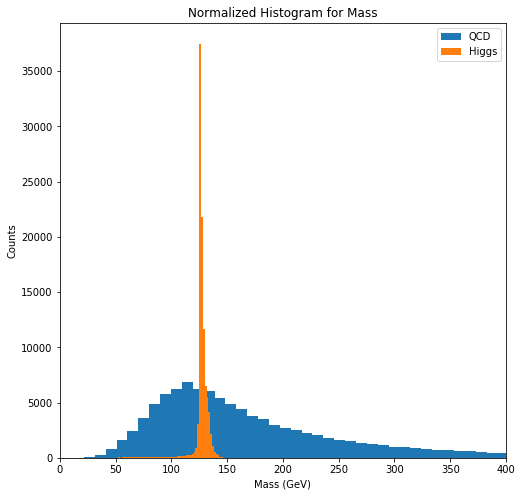

In [4]:
plt.figure(figsize=(8,8))
plt.hist(massBackground, 80, label='QCD')
plt.hist(massSignal, 80, label='Higgs')
plt.title("Normalized Histogram for Mass")
plt.ylabel("Counts")
plt.xlim(0, 400)
plt.xlabel("Mass (GeV)")
plt.legend()
plt.show()

The plot for the Higgs Data shows that is centered around 125 GeV, roughly the mass for the Higgs Boson particle.

In [5]:
print("The mean of the signal is: ", np.mean(massSignal))
print("The mean of the background is: ", np.mean(massBackground))

The mean of the signal is:  126.663832224776
The mean of the background is:  177.27313143544927


The dataset descriptions give us the expected yield values, and asks that we normalize our Higgs and QCD samples accordingly. Therefore, we need to normalize our Higgs and QCD samples to $N_{Higgs} = 50$ and $N_{QCD} = 2000$.

In [6]:
n_higgs = 50
n_qcd = 2000
n_sum = n_higgs + n_qcd

In [7]:
significance = stats.norm.ppf(stats.poisson.cdf(n_sum, n_qcd))
significance

1.1282230087754428

In [8]:
n_higgs/np.sqrt(n_qcd)

1.118033988749895

### 2. Identify mass cuts to optimize the expected significance.

Our goal with mass cuts is to cut our data so that we can maximize the Higgs Boson data (signal) and minimize the QCD data (background). In order to do this, I will have to create a function that carries out the cut for me and returns the data.

We will first write a function that carries out the mass cut, and then write a seperate function that uses the following equation to calculate the estimated significance of the mass cut. Lastly, we repeat this process till we find a mass cut that gives us the highest expected significance.

In [9]:
# Mass Cut function that returns values within the range.
def massCut (data, lowerBound, upperBound):
    indices = (data['mass'] > lowerBound) & (data['mass'] < upperBound)
    values = data[indices]
    return values

# Calculate yield values.
def yieldValue (data, values, original):
    ratio = len(values)/len(data)
    newYield = original * ratio
    return newYield

# Calculate expected significance.
def significance (higgsYield, qcdYield):
    return higgsYield/np.sqrt(qcdYield)

In [10]:
# Testing our functions
higgsCut1 = massCut(signal, 100, 150)
qcdCut1 = massCut(background, 100, 150)
higgsYield = yieldValue(signal, higgsCut1, 50)
qcdYield = yieldValue(background, qcdCut1, 2000)
print(higgsYield)
print(qcdYield)
print("The expected significance of this mass cut is: ", significance(higgsYield, qcdYield))

49.025999999999996
626.22
The expected significance of this mass cut is:  1.9591288224692132


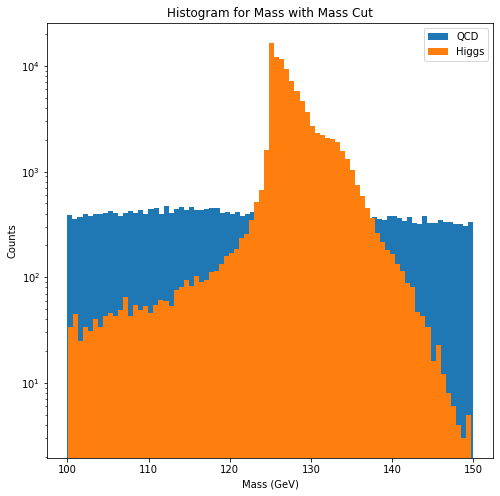

In [45]:
plt.figure(figsize=(8,8))
plt.hist(qcdCut1['mass'], 80, label='QCD')
plt.hist(higgsCut1['mass'], 80, label='Higgs')
plt.title("Histogram for Mass with Mass Cut")
plt.yscale('log')
plt.ylabel("Counts")
plt.xlabel("Mass (GeV)")
plt.legend()
plt.show()

We want to try and find a mass cut that gives us the highest expected significance, so let's repeat the process for different intervals.

In [12]:
higgsCut2 = massCut(signal, 110, 140)
qcdCut2 = massCut(background, 110, 140)
higgsYield = yieldValue(signal, higgsCut2, 50)
qcdYield = yieldValue(background, qcdCut2, 2000)
print(higgsYield)
print(qcdYield)
print("The expected significance of this mass cut is: ", significance(higgsYield, qcdYield))

48.327
390.26
The expected significance of this mass cut is:  2.446317466358408


In [13]:
higgsCut3 = massCut(signal, 120, 130)
qcdCut3 = massCut(background, 120, 130)
higgsYield = yieldValue(signal, higgsCut3, 50)
qcdYield = yieldValue(background, qcdCut3, 2000)
print(higgsYield)
print(qcdYield)
print("The expected significance of this mass cut is: ", significance(higgsYield, qcdYield))

37.914500000000004
128.28
The expected significance of this mass cut is:  3.3475406344693024


In [14]:
higgsCut4 = massCut(signal, 121, 129)
qcdCut4 = massCut(background, 122, 129)
higgsYield = yieldValue(signal, higgsCut4, 50)
qcdYield = yieldValue(background, qcdCut4, 2000)
print(higgsYield)
print(qcdYield)
print("The expected significance of this mass cut is: ", significance(higgsYield, qcdYield))

34.8155
90.0
The expected significance of this mass cut is:  3.669875929253074


In [15]:
higgsCut5 = massCut(signal, 123, 129)
qcdCut5 = massCut(background, 123, 129)
higgsYield = yieldValue(signal, higgsCut5, 50)
qcdYield = yieldValue(background, qcdCut5, 2000)
print(higgsYield)
print(qcdYield)
print("The expected significance of this mass cut is: ", significance(higgsYield, qcdYield))

34.3765
76.66000000000001
The expected significance of this mass cut is:  3.926243676981313


As you can see from the above blocks of code, I repeatedly entered lower and upper bounds for a mass cut, until I reached an expected significance that was close to 5$\sigma$. The above value for expected significance was the closest I got, without losing too much of the signal. Below is a plot of this mass cut:

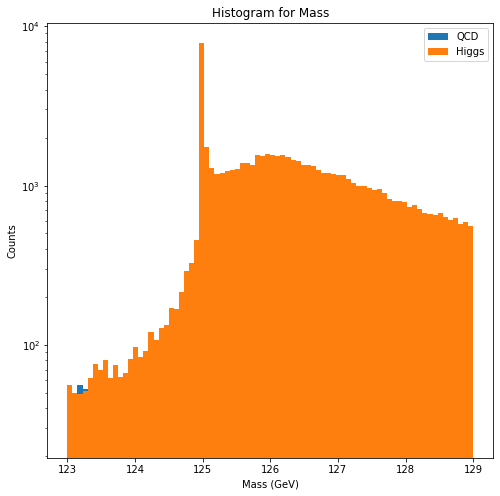

In [51]:
plt.figure(figsize=(8,8))
plt.hist(qcdCut5['mass'], 80, label='QCD')
plt.hist(higgsCut5['mass'], 80, label='Higgs')
plt.title("Histogram for Mass")
plt.ylabel("Counts")
plt.yscale('log')
plt.xlabel("Mass (GeV)")
plt.legend()
plt.show()

### 3. Make stacked histogram plots for the rest of the features.

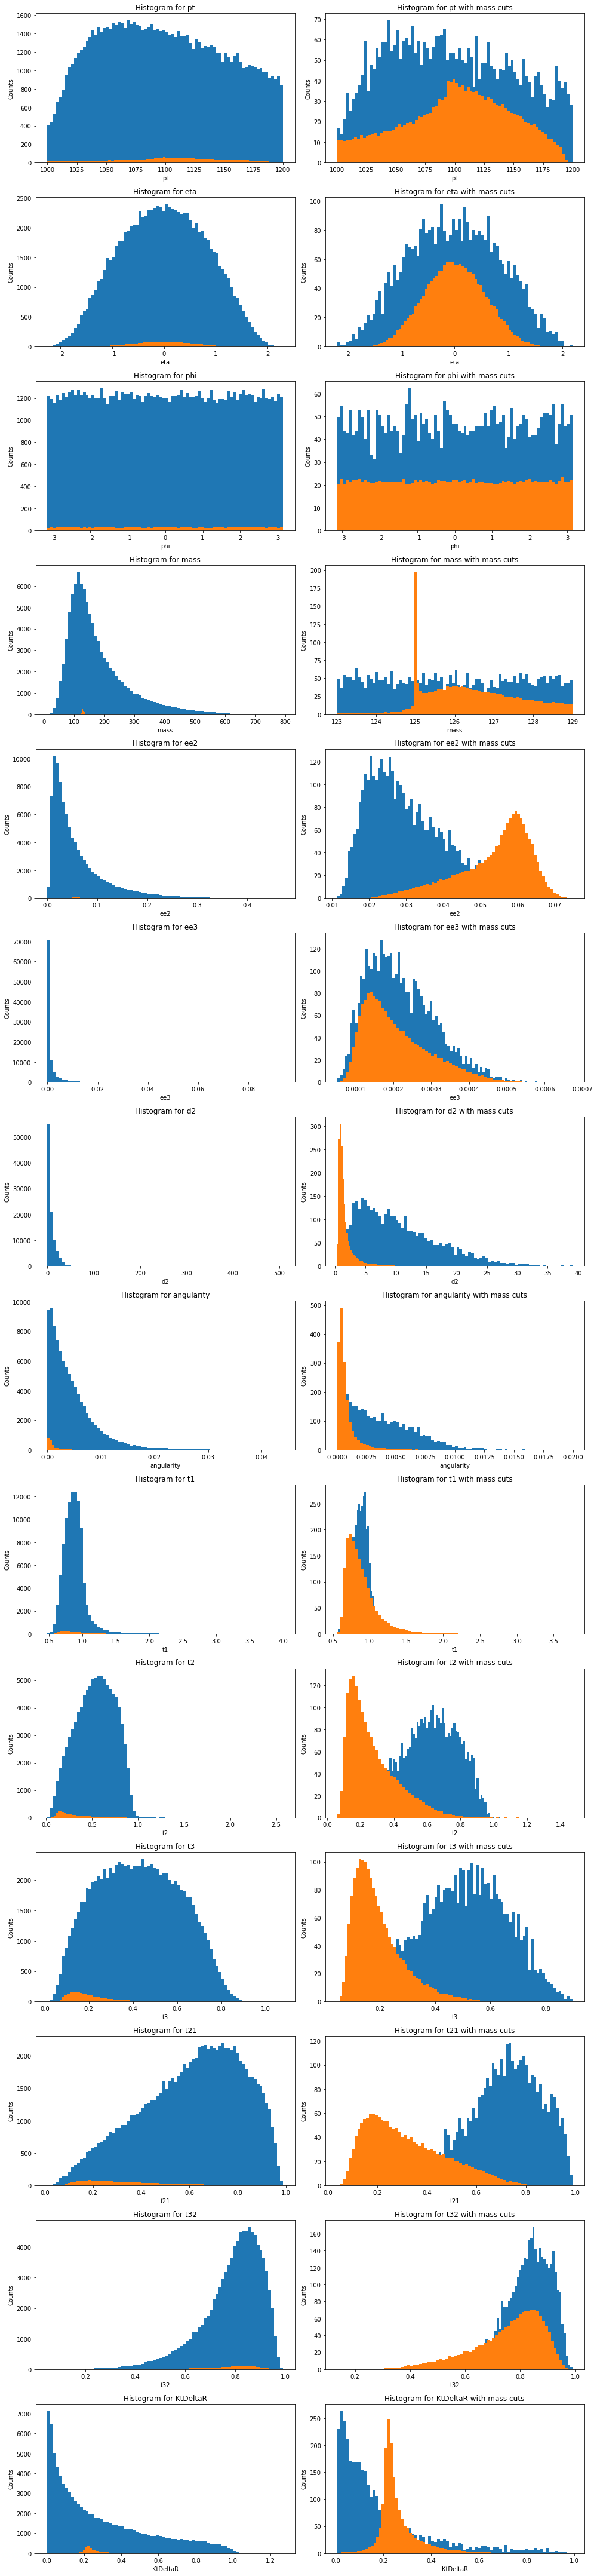

In [53]:
# Let us use subplots for this question, so we can write a loop to create all the plots for us.
# Remember to adjust the weights so that you can see the signal and background.
fig, ax = plt.subplots(14, 2, figsize=(14, 60))

x = 0
for key in higgsCut5:
    ax[x,0].set_title("Histogram for " + key)
    ax[x,0].set_ylabel("Counts")
    ax[x,0].set_xlabel(key)
    ax[x,0].hist(background[key], 80, weights=[(2000/2050) * np.ones(len(massSignal))],  label='QCD')
    ax[x,0].hist(signal[key], 80, weights=[(50/2050) * np.ones(len(massSignal))],  label='Higgs')
    
    ax[x,1].set_title("Histogram for " + key + " with mass cuts")
    ax[x,1].set_ylabel("Counts")
    ax[x,1].set_xlabel(key)
    ax[x,1].hist(qcdCut5[key], 80, weights=[(2000/2050) * np.ones(len(qcdCut5))],  label='QCD')
    ax[x,1].hist(higgsCut5[key], 80, weights=[(50/2000) * np.ones(len(higgsCut5))],  label='Higgs')
    x = x + 1
fig.tight_layout()
plt.show()

From the plots above, we can see that there are several features that show high discrimination between the signal and background. These features are d2, ee2 and mass. Let us use these to optimize event selection.

### 4. Optimize event selections using multiple features (if necessary)

Let us repeat what we did for mass, and write a function that gives us the expected significance of our feature cut.

In [19]:
# d2 Cut function that returns values within the range.
def d2Cut (data, lowerBound, upperBound):
    indices = (data['d2'] > lowerBound) & (data['d2'] < upperBound)
    values = data[indices]
    return values

In [20]:
higgsD2Cut = d2Cut(higgsCut5, 0, 10)
qcdD2Cut = d2Cut(qcdCut5, 0, 10)
higgsD2Yield = yieldValue(signal, higgsD2Cut, 50)
qcdD2Yield = yieldValue(background, qcdD2Cut, 2000)
print(higgsD2Yield)
print(qcdD2Yield)
print("The expected significance is: ", significance(higgsD2Yield, qcdD2Yield))

34.277
42.02
The expected significance is:  5.287797077191725


In [21]:
# ee2 Cut function that returns values within the range.
def EE2Cut (data, lowerBound, upperBound):
    indices = (data['ee2'] > lowerBound) & (data['ee2'] < upperBound)
    values = data[indices]
    return values

In [22]:
higgsEE2Cut = EE2Cut(higgsD2Cut, 0, 0.07)
qcdEE2Cut = EE2Cut(qcdD2Cut, 0, 0.07)
higgsEE2Yield = yieldValue(signal, higgsEE2Cut, 50)
qcdEE2Yield = yieldValue(background, qcdEE2Cut, 2000)
print(higgsEE2Yield)
print(qcdEE2Yield)
print("The expected significance is: ", significance(higgsEE2Yield, qcdEE2Yield))

34.0555
42.02
The expected significance is:  5.253627019934732


As you can see after event selection with D2 as the feature, the expected significance went up from 3.926 to 5.25.

The main reason that these three descriptors create the highest significance, is because they remove more of the background than the signal, allowing for us to get higher expected significance. In each of the yield values I produced above, you can see the drop in both $N_{higgs}$ and $N_{qcd}$ from 50 and 2000 respectively.

# Lab 8

In [23]:
import h5py
f1 = h5py.File("data_highLumi_pt_1000_1200.h5", 'r')
f2 = h5py.File("data_lowLumi_pt_1000_1200.h5", 'r')
dataHigh = f1.get('data').get('block0_values')
dataLow = f2.get('data').get('block0_values')

### 1. High luminosity data

Towards the end of Lab 7, the two features we focused on for event selection were EE2 and D2, as well as mass. In the next few plots, we will compare and contrast the data with and without event selection. 

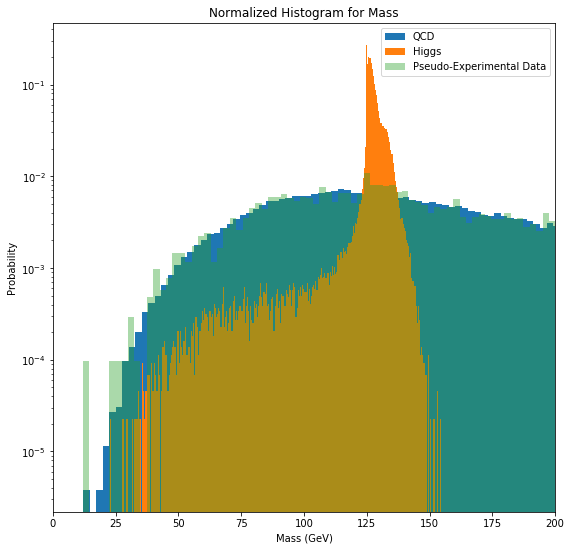

In [24]:
plt.figure(figsize=(9,9))
plt.hist(background['mass'], 300, density=True, label='QCD')
plt.hist(signal['mass'], 300, density=True, label='Higgs')
plt.hist(dataHigh[:, 3], 300, density=True, alpha = 0.4, label='Pseudo-Experimental Data')
plt.title("Normalized Histogram for Mass")
plt.ylabel("Probability")
plt.yscale('log')
plt.xlim(0, 200)
plt.xlabel("Mass (GeV)")
plt.legend()
plt.show()

In [25]:
# Mass Cut function that returns values within the range.
def massCutLumi (data, lowerBound, upperBound):
    indices = (data > lowerBound) & (data < upperBound)
    values = data[indices]
    return values

In [26]:
highLumiCut = massCutLumi(dataHigh[:, 3], 120, 130)

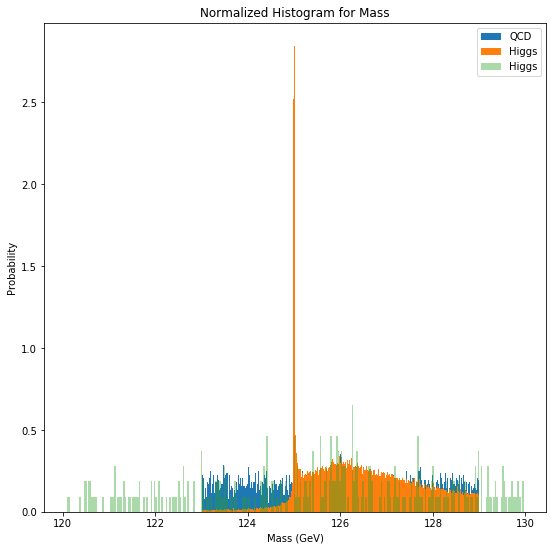

In [27]:
plt.figure(figsize=(9,9))
plt.hist(qcdCut5['mass'], 300, density=True, label='QCD')
plt.hist(higgsCut5['mass'], 300, density=True, label='Higgs')
plt.hist(highLumiCut[:], 300, density=True, alpha = 0.4, label='Higgs')
plt.title("Normalized Histogram for Mass")
plt.ylabel("Probability")
plt.xlabel("Mass (GeV)")
plt.legend()
plt.show()

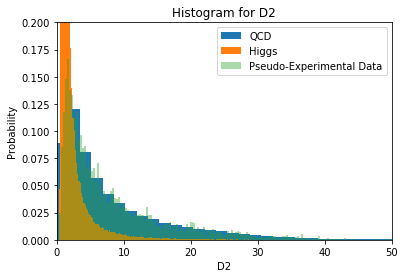

In [28]:
plt.hist(background['d2'], 300, density=True, label='QCD')
plt.hist(signal['d2'], 300, density=True, label='Higgs')
plt.hist(dataHigh[:, 6], 300, density=True, alpha = 0.4, label='Pseudo-Experimental Data')
plt.title("Histogram for D2")
plt.ylabel("Probability")
plt.ylim(0, 0.2)
plt.xlabel("D2")
plt.xlim(0,50)
plt.legend()
plt.show()

In [29]:
highLumiCutD2 = massCutLumi(dataHigh[:, 6], 0, 10)

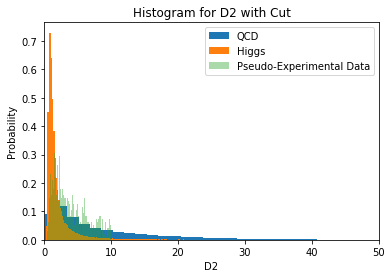

In [30]:
plt.hist(background['d2'], 300, density=True, label='QCD')
plt.hist(signal['d2'], 300, density=True, label='Higgs')
plt.hist(highLumiCutD2[:], 300, density=True, alpha = 0.4, label='Pseudo-Experimental Data')
plt.title("Histogram for D2 with Cut")
plt.ylabel("Probability")
plt.xlabel("D2")
plt.xlim(0,50)
plt.legend()
plt.show()

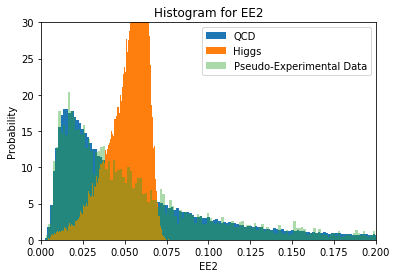

In [31]:
plt.hist(background['ee2'], 300, density=True, label='QCD')
plt.hist(signal['ee2'], 300, density=True, label='Higgs')
plt.hist(dataHigh[:, 4], 300, density=True, alpha = 0.4, label='Pseudo-Experimental Data')
plt.title("Histogram for EE2")
plt.ylabel("Probability")
plt.ylim(0, 30)
plt.xlabel("EE2")
plt.xlim(0,0.2)
plt.legend()
plt.show()

In [32]:
highLumiCutEE2 = massCutLumi(dataHigh[:, 4], 0, 0.07)

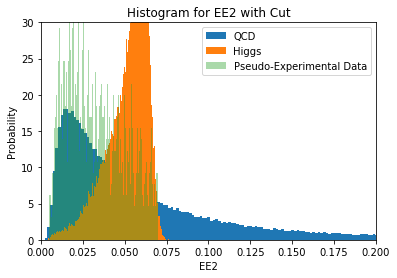

In [33]:
plt.hist(background['ee2'], 300, density=True, label='QCD')
plt.hist(signal['ee2'], 300, density=True, label='Higgs')
plt.hist(highLumiCutEE2[:], 300, density=True, alpha = 0.4, label='Pseudo-Experimental Data')
plt.title("Histogram for EE2 with Cut")
plt.ylabel("Probability")
plt.ylim(0, 30)
plt.xlabel("EE2")
plt.xlim(0,0.2)
plt.legend()
plt.show()

We can see an increase in the Pseudo-Experimental Data signal as opposed to the background. 

### Low luminosity data

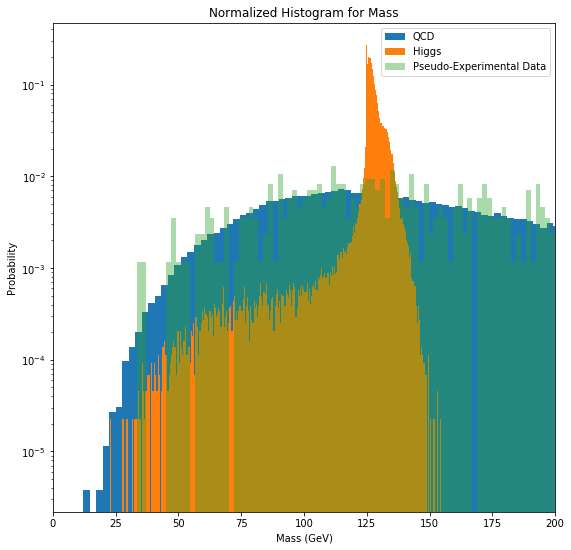

In [34]:
plt.figure(figsize=(9,9))
plt.hist(background['mass'], 300, density=True, label='QCD')
plt.hist(signal['mass'], 300, density=True, label='Higgs')
plt.hist(dataLow[:, 3], 300, density=True, alpha = 0.4, label='Pseudo-Experimental Data')
plt.title("Normalized Histogram for Mass")
plt.ylabel("Probability")
plt.yscale('log')
plt.xlim(0, 200)
plt.xlabel("Mass (GeV)")
plt.legend()
plt.show()

In [35]:
lowLumiCut = massCutLumi(dataLow[:, 3], 120, 130)

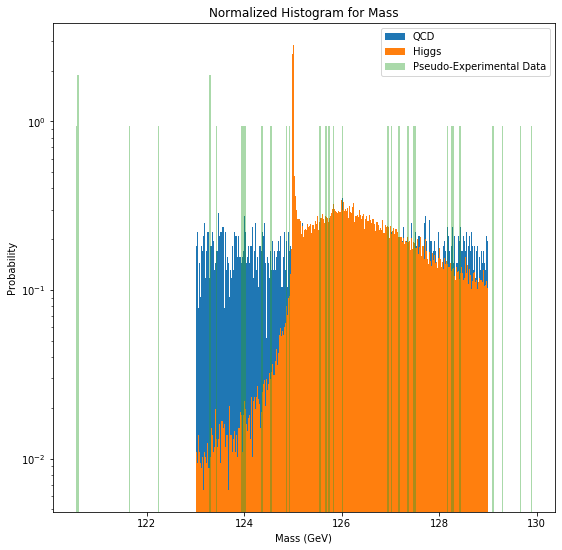

In [36]:
plt.figure(figsize=(9,9))
plt.hist(qcdCut5['mass'], 300, density=True, label='QCD')
plt.hist(higgsCut5['mass'], 300, density=True, label='Higgs')
plt.hist(lowLumiCut[:], 300, density=True, alpha = 0.4, label='Pseudo-Experimental Data')
plt.title("Normalized Histogram for Mass")
plt.yscale('log')
plt.ylabel("Probability")
plt.xlabel("Mass (GeV)")
plt.legend()
plt.show()

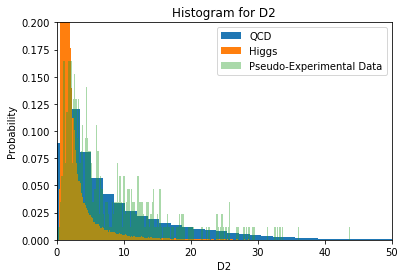

In [37]:
plt.hist(background['d2'], 300, density=True, label='QCD')
plt.hist(signal['d2'], 300, density=True, label='Higgs')
plt.hist(dataLow[:, 6], 300, density=True, alpha = 0.4, label='Pseudo-Experimental Data')
plt.title("Histogram for D2")
plt.ylabel("Probability")
plt.ylim(0, 0.2)
plt.xlabel("D2")
plt.xlim(0,50)
plt.legend()
plt.show()

In [38]:
lowLumiCutD2 = massCutLumi(dataLow[:, 6], 0, 10)

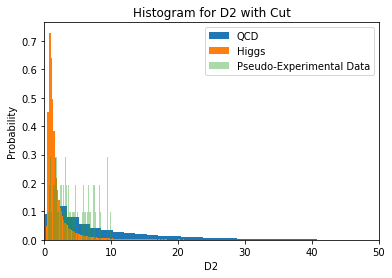

In [39]:
plt.hist(background['d2'], 300, density=True, label='QCD')
plt.hist(signal['d2'], 300, density=True, label='Higgs')
plt.hist(lowLumiCutD2[:], 300, density=True, alpha = 0.4, label='Pseudo-Experimental Data')
plt.title("Histogram for D2 with Cut")
plt.ylabel("Probability")
plt.xlabel("D2")
plt.xlim(0,50)
plt.legend()
plt.show()

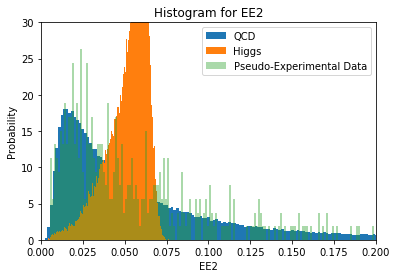

In [40]:
plt.hist(background['ee2'], 300, density=True, label='QCD')
plt.hist(signal['ee2'], 300, density=True, label='Higgs')
plt.hist(dataLow[:, 4], 300, density=True, alpha = 0.4, label='Pseudo-Experimental Data')
plt.title("Histogram for EE2")
plt.ylabel("Probability")
plt.ylim(0, 30)
plt.xlabel("EE2")
plt.xlim(0,0.2)
plt.legend()
plt.show()

In [41]:
lowLumiCutEE2 = massCutLumi(dataLow[:, 4], 0, 0.07)

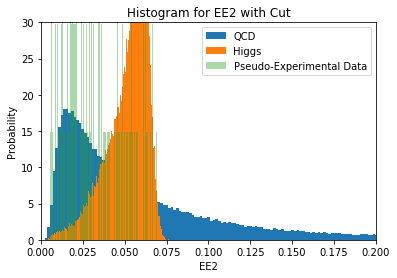

In [42]:
plt.hist(background['ee2'], 300, density=True, label='QCD')
plt.hist(signal['ee2'], 300, density=True, label='Higgs')
plt.hist(lowLumiCutEE2[:], 300, density=True, alpha = 0.4, label='Pseudo-Experimental Data')
plt.title("Histogram for EE2 with Cut")
plt.ylabel("Probability")
plt.ylim(0, 30)
plt.xlabel("EE2")
plt.xlim(0,0.2)
plt.legend()
plt.show()

### 3. 95% Confidence Level of signal yields

First we need to calculate the observed significance of the low lumosity data.

In [43]:
# Not sure if this is the correct way to calculate observed significance.
higgs = 50 * len(dataLow[:, 4])/len(signal['ee2'])
qcd = 2000 * len(dataLow[:, 4])/len(background['ee2'])
expected = higgs / np.sqrt(qcd)
expected

0.07433034373659253

In [44]:
confidenceInterval = stats.poisson.ppf(0.95, expected)
confidenceInterval

1.0